$$ \LARGE \underline
{\textbf{Problema 1}}
$$

Calcule las frecuencias naturales de oscilación transversal de una barra de acero ($densidad= 7850\ kg/m^{3}$ y módulo de elasticidad $E = 210 GPa$), de $1\ m$ de longitud, $10\ cm^{2}$
 de área, momento de
inercia de $10\ cm^{4}$
. Realice el cálculo para un número variable de elementos y estudie la convergencia
de sus resultados. Haga el cálculo para matrices de masa concentrada y consistente. Grafique los
desplazamientos en función de la posición para los primeros modos normales.


<center><img src="ImgP1G4.png"></center>

In [1]:
import numpy as np
import MEF as mef
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
d = 7850  # kg/m3
LT = 1  # m
Ei = 210e9  # Pa
Ai = 10/(100**2)  # m2
I = 10/(100**4)  # m4

In [3]:
Ne = 100  # cantidad de elementos que tendrá la barra
glxn = 2  # grados de libertad por nodo
dimension_elementos = 1

In [4]:
L = LT/Ne  # longitud de cada elemento

In [5]:
MN = np.array([(i*L, (i+1)*L) for i in range(Ne+1)])
MC = np.array([[i, i+1] for i in range(Ne)])
Nn = MN.shape[0]
Nnxe = MC.shape[1]

In [6]:
E = np.zeros([Ne])
A = np.zeros([Ne])
for e in range(Ne):
    E[e] = Ei
    A[e] = Ai

In [7]:
Ke = {}
for e in range(Ne):
    Ke[e] = (E[e]*I/L**3)*np.array([[12,6*L,-12,6*L],
                           [6*L,4*(L**2),-6*L,2*(L**2)],
                           [-12,-6*L,12,-6*L],
                           [6*L,2*(L**2),-6*L,4*(L**2)]])

In [8]:
def M_global(Me,Nn,Ne,glxn):   
    M = np.zeros([glxn*Nn,glxn*Nn])
    for e in range(Ne):
        for i in range(Nnxe):
            rangoi = np.linspace(i*glxn,(i+1)*glxn-1,glxn).astype(int)
            rangoni = np.linspace(MC[e,i]*glxn,(MC[e, i]+1)*glxn-1,glxn).astype(int)
            for j in range(Nnxe):
                rangoj = np.linspace(j*glxn,(j+1)*glxn-1,glxn).astype(int)
                rangonj = np.linspace(MC[e,j]*glxn,(MC[e, j]+1)*glxn-1,glxn).astype(int)
                M[np.ix_(rangoni,rangonj)] += Me[e][np.ix_(rangoi,rangoj)]
    return M

In [9]:
K = M_global(Ke, Nn, Ne, glxn)

$$
$$

$ \large
\text{Masa consistente}
$

In [10]:
Me = {}
for e in range(Ne):
    Me[e] = (d*A[e]*L/420)*np.array([[156,22*L,54,-13*L],
                           [22*L,4*L**2,13*L,-3*L**2],
                           [54,13*L,156,-22*L],
                           [-13*L,-3*L**2,-22*L,4*L**2]])

In [11]:
M = M_global(Me, Nn, Ne, glxn)

In [12]:
s = np.array([0,1])
r = mef.vector_complemento(s, MN, glxn)

Con las matrices de masas y de rigidez globales, para estudiar los modos normales de vibración se hace:

$ \large
([K]-\omega^{2}[M])(u)=0
$

In [13]:
om_2, V = linalg.eigh(K[np.ix_(r,r)],M[np.ix_(r,r)])

'om_2' posee los valores de los modos normales de vibración

'V' devuele los desplazamientos y angulos en cada columna. Cada columna corresponde a un distinto modo de normal de vibración.

In [14]:
f = np.sqrt(om_2)/(2*np.pi)

'f' son las frecuencias de los modos normales

In [15]:
V = np.vstack((np.zeros([2,V.shape[1]]),V))

Nos interesan los primero 4 / 5 modos de vibración, los más altos no tanto porque alcanzan muy altas frecuencias. 

In [16]:
desp = V[0::2, :]/V[0::2, :][-1, :]  # [0::2] Devuelve solo los elementos [0],[2],[4],[6],...

In [17]:
x = np.linspace(0,LT,Nn)

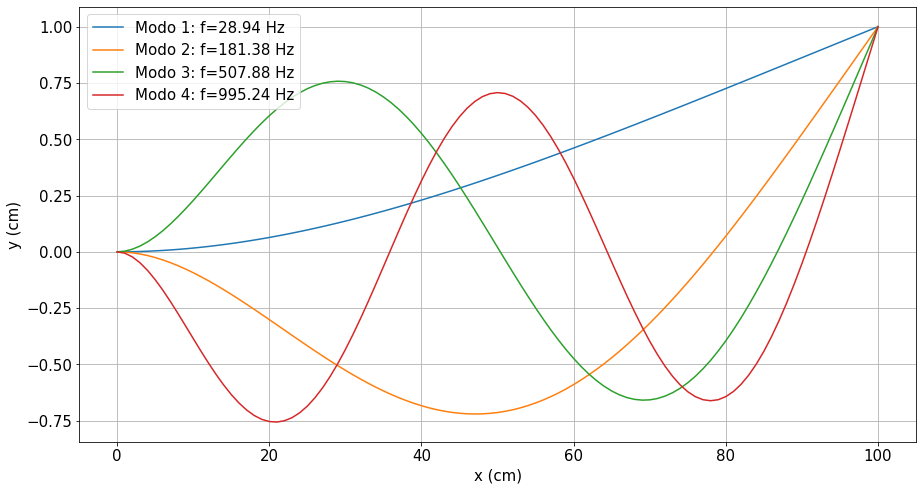

In [18]:
plt.rc('figure', figsize=(15, 8))
plt.rc('font', size=15)
for i in range(4):
    plt.plot(x*100, desp[:,i], label='Modo '+str(i+1)+': f='+str(round(f[i], 2))+' Hz')
plt.grid()
plt.ylabel('y (cm)')
plt.xlabel('x (cm)')
plt.legend()
plt.show()

$$
$$

$ \large
\text{Masa concentrada}
$

In [19]:
Me_0 = {}
for e in range(Ne):
    Me_0[e] = (d*A[e]*L/24)*np.array([[12,0,0,0],
                           [0,L**2,0,0],
                           [0,0,12,0],
                           [0,0,0,L**2]])
    
M_0 = M_global(Me_0, Nn, Ne, glxn) 

In [20]:
om_2_0, V_0 = linalg.eigh(K[np.ix_(r,r)],M_0[np.ix_(r,r)])
f_0 = np.sqrt(om_2_0)/(2*np.pi)
V_0 = np.vstack((np.zeros([2,V_0.shape[1]]),V_0))
desp_0 = V_0[0::2, :]/V_0[0::2, :][-1, :]

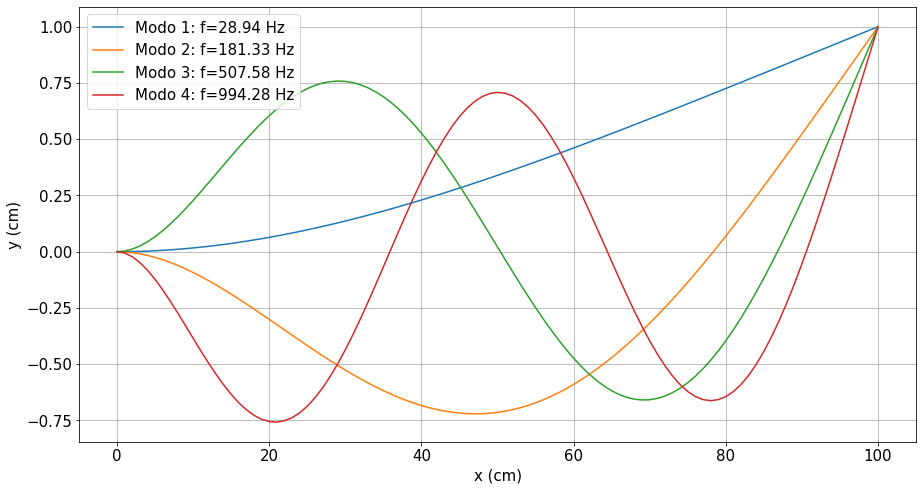

In [21]:
plt.rc('figure', figsize=(15, 8))
plt.rc('font', size=15)
for i in range(4):
    plt.plot(x*100, desp_0[:,i], label='Modo '+str(i+1)+': f='+str(round(f_0[i], 2))+' Hz')
plt.grid()
plt.ylabel('y (cm)')
plt.xlabel('x (cm)')
plt.legend()
plt.show()

$$
$$

$ \large
\text{Estudio de la Convergencia}
$

In [22]:
ne = np.linspace(2,20,19).astype(int)
f_1 = []  # acumulo las frecuencias de cada modo
f_2 = []  # cada pos corresponde a una cantidad de nodos
f_3 = []
f_4 = []
for Ne in ne: 
    L = LT/Ne  # longitud de cada elemento
    MN = np.array([(i*L, (i+1)*L) for i in range(Ne+1)])
    MC = np.array([[i, i+1] for i in range(Ne)])
    Nn = MN.shape[0]
    Nnxe = MC.shape[1]
    E = np.zeros([Ne])
    A = np.zeros([Ne])
    for e in range(Ne):
        E[e] = Ei
        A[e] = Ai
    Ke = {}
    for e in range(Ne):
        Ke[e] = (E[e]*I/L**3)*np.array([[12,6*L,-12,6*L],
                               [6*L,4*(L**2),-6*L,2*(L**2)],
                               [-12,-6*L,12,-6*L],
                               [6*L,2*(L**2),-6*L,4*(L**2)]])
    Me = {}
    for e in range(Ne):
        Me[e] = (d*A[e]*L/420)*np.array([[156,22*L,54,-13*L],
                               [22*L,4*L**2,13*L,-3*L**2],
                               [54,13*L,156,-22*L],
                               [-13*L,-3*L**2,-22*L,4*L**2]])
        
    K = M_global(Ke, Nn, Ne, glxn)
    M = M_global(Me, Nn, Ne, glxn)
    s = np.array([0,1])
    r = mef.vector_complemento(s, MN, glxn)
    om_2, V = linalg.eigh(K[np.ix_(r,r)],M[np.ix_(r,r)])
    f_1.append(np.sqrt(om_2[0])/(2*np.pi))
    f_2.append(np.sqrt(om_2[1])/(2*np.pi))
    f_3.append(np.sqrt(om_2[2])/(2*np.pi))
    f_4.append(np.sqrt(om_2[3])/(2*np.pi))

f_1 = np.array(f_1)
f_2 = np.array(f_2)
f_3 = np.array(f_3)
f_4 = np.array(f_4)

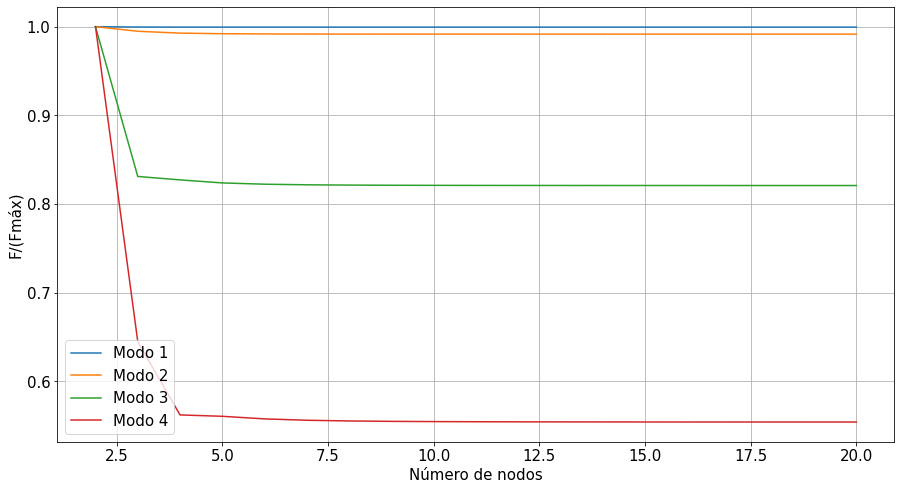

In [23]:
plt.rc('figure', figsize=(15, 8))
plt.rc('font', size=15)
plt.plot(ne, f_1/f_1.max(), label='Modo 1')
plt.plot(ne, f_2/f_2.max(), label='Modo 2')
plt.plot(ne, f_3/f_3.max(), label='Modo 3')
plt.plot(ne, f_4/f_4.max(), label='Modo 4')
plt.grid()
plt.ylabel('F/(Fmáx)')
plt.xlabel('Número de nodos')
plt.legend()
plt.show()

<div style="background:#999900"> la idea era comparar las frecuencias entre métodos</div>

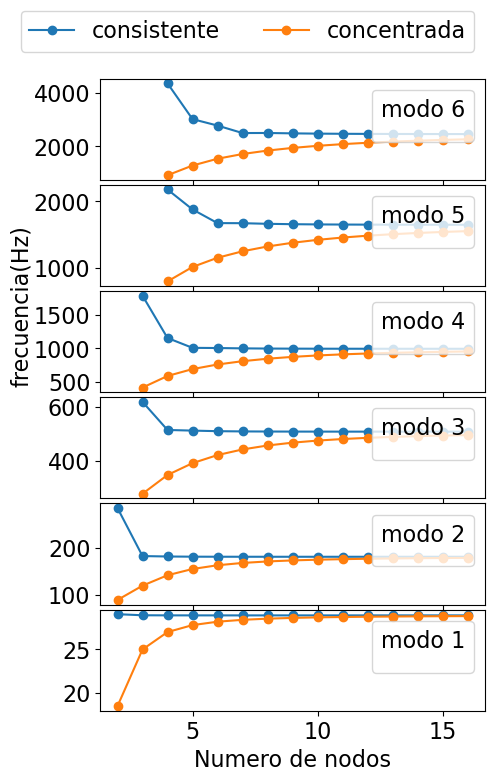

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
path='../../../../EjemplosEnClase/Guia4/FrecuanciavsN.png'
Image(path)